<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_1_2_Cost_Function_Intuition_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost Function Intuition: 3D

## `widget`

In [1]:
!pip install -q ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.linear_model import LinearRegression

## Cost Function Visualization

### The Data

In [4]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

In [5]:
x_train, x_train.reshape(-1, 1)

(array([1. , 1.7, 2. , 2.5, 3. , 3.2]),
 array([[1. ],
        [1.7],
        [2. ],
        [2.5],
        [3. ],
        [3.2]]))

In [6]:
# use sklearn to find the best fit
model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
model

LinearRegression()

In [7]:
# best fit w and b
model.coef_[0], model.intercept_

(209.36293436293442, 2.4227799227798528)

### Functions

In [8]:
# regression line (model)
def f_wb(X, w, b):
    return np.dot(w, X) + b

# cost function
def J_wb(X, y, w, b):
    m = X.shape[0]
    return sum(((np.dot(w, X) + b) - y)**2) / (2 * m)

# cost lines
def mk_cost_lines(x, y, w, b, ax):
    ''' makes vertical cost lines '''
    cstr = 'cost = (1/m)*('
    ctot = 0
    label = 'cost for point'
    addedbreak = False

    for p in zip(x, y):
        # f_wb_p calculates the predicted values
        #   that are vertically aligned with the
        #   actual values
        f_wb_p = w * p[0] + b
        # c_p is the cost for the point
        c_p = ((f_wb_p - p[1])**2) / 2

        # draws the cost lines (aka residual lines)
        ax.vlines(p[0], p[1], f_wb_p,
                lw=4, color='purple', ls='dotted', label=label)
        label='' # prevents legend from repeating the label
        cxy = [p[0], p[1] + (f_wb_p - p[1]) / 2]
        ax.annotate(f'{c_p:0.0f}',
                    xy=cxy,
                    xycoords='data',
                    color='purple',
                    xytext=(5, 0),
                    textcoords='offset points')
        cstr += f'{c_p:0.0f} + '
        if len(cstr) > 38 and addedbreak is False:
            cstr += '\n'
            addedbreak = True
        ctot += c_p

    ctot = ctot / len(x)
    cstr = cstr[:-3] + f') = {ctot:0.0f}'
    ax.text(0.15, 0.02, cstr, transform=ax.transAxes, color='purple')

# plot data points and regression line
def plt_house_x(X, y, f_wb_data=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1)

    ax.scatter(X, y, marker='x', c='r', label='Actual Value', zorder=4)

    ax.set_title('Housing Prices')
    ax.set_xlabel('Size (1000 sqft)')
    ax.set_ylabel('Price (in 1000s of dollars)')

    if f_wb_data is not None:
        ax.plot(X, f_wb_data, c='dodgerblue', linewidth=5, label='Our Prediction')

    ax.legend()

In [9]:
def plt_stationary(x_train, y_train):
    # set up figure
    fig = plt.figure(figsize=(12, 12))
    fig.set_facecolor('white')
    fig.canvas.toolbar_position = 'top'

    gs = GridSpec(2, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, :], projection='3d')
    ax = np.array([ax0, ax1, ax2])

    # setup useful ranges and common linespaces
    b_range = np.array([50 - 300., 50 + 300])
    w_range = np.array([200 - 300., 200 + 300])
    b_space = np.linspace(*b_range, 200)
    w_space = np.linspace(*w_range, 100)

    # get cost for w, b
    # get ranges for contour and 3D
    tmp_b, tmp_w = np.meshgrid(b_space, w_space)
    z = np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i, j] = J_wb(x_train,
                           y_train,
                           tmp_w[i, j],
                           tmp_b[i, j])
            if z[i, j] == 0:
                z[i, i] = 1e-6

    # initial point
    #w0 = 200; b0 = -100
    w0 = model.coef_[0]; b0 = model.intercept_

    # plot model with cost
    f_wb_data = f_wb(x_train, w0, b0)
    mk_cost_lines(x_train, y_train, w0, b0, ax=ax0)
    plt_house_x(x_train, y_train, f_wb_data=f_wb_data, ax=ax0)


    # plot contour
    ax[1].contour(tmp_w, tmp_b, np.log(z), levels=50, cmap='Greens')
    ax[1].set_title('Cost(w, b)')
    ax[1].set_xlabel('w', fontsize=10)
    ax[1].set_ylabel('b', fontsize=10)
    ax[1].set_xlim(w_range)
    ax[1].set_ylim(b_range)
    cscat = ax[1].scatter(w0, b0,
                          s=100, c='dodgerblue',
                          zorder=10, label='cost with \ncurrent w,b')
    chline = ax[1].hlines(b0, ax[1].get_xlim()[0], w0,
                          color='purple', lw=4, ls='dotted')
    cvline = ax[1].vlines(w0, ax[1].get_ylim()[0], b0,
                          color='purple', lw=4, ls='dotted')
    ax[1].text(0.5, 0.95, 'Click to choose w,b',
               bbox=dict(facecolor='white', ec='lightgray'),
               fontsize=10,
               verticalalignment='center',
               horizontalalignment='center',
               transform=ax[1].transAxes)
    ax[1].legend(loc='upper left')

    # surface plot of J(w,b)
    ax[2].plot_surface(tmp_w, tmp_b, z, cmap='Greens', alpha=0.8, antialiased=True)
    ax[2].plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
    ax[2].set_xlabel('$w$')
    ax[2].set_ylabel('$b$')
    ax[2].zaxis.set_rotate_label(False)
    ax[2].xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].set_zlabel('J(w,b)\n\n', rotation=90)
    ax[2].set_title('J(w,b) \n [You can rotate this figure]', size=12)
    cst = ax[2].scatter3D(w0, b0, J_wb(x_train, y_train, w0, b0), marker='X', s=100,
                                     c='red')
    ax[2].view_init(30, -120)

    return fig, ax, [cscat, chline, cvline, cst]

In [10]:
class plt_update_onclick:
    def __init__(self, fig, ax, x_train, y_train, dyn_items):
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.dyn_items = dyn_items
        self.cid = fig.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if event.inaxes == self.ax[1]:
            ws = event.xdata
            bs = event.ydata
            cst = J_wb(self.x_train, self.y_train, ws, bs)

            # clear and redraw line plot
            self.ax[0].clear()
            f_wb_data = f_wb(self.x_train, ws, bs)
            mk_cost_lines(self.x_train, self.y_train, ws, bs, self.ax[0])
            plt_house_x(self.x_train, self.y_train, f_wb_data=f_wb_data, ax=self.ax[0])

            # remove lines and re-add on contour plot and 3d plot
            for artist in self.dyn_items:
                artist.remove()

            a = self.ax[1].scatter(ws, bs, s=100, c='dodgerblue',
                                   zorder=10, label='cost with \ncurrent w,b')
            b = self.ax[1].hlines(bs, ax[1].get_xlim()[0], ws,
                                  color='purple', lw=4, ls='dotted')
            c = self.ax[1].vlines(ws, ax[1].get_ylim()[0], bs,
                                  color='purple', lw=4, ls='dotted')
            d = self.ax[1].annotate(f"Cost: {cst:.0f}",
                                    xy=(ws, bs),
                                    xytext=(4,4),
                                    textcoords = 'offset points',
                                    bbox=dict(facecolor='white'),
                                    size = 10)
            # add a point in 3D surface plot
            e = self.ax[2].scatter3D(ws, bs, cst, marker='X', s=100,
                                     c='red')

            self.dyn_items = [a, b, c, d, e]
            self.fig.canvas.draw()

### The Visualization

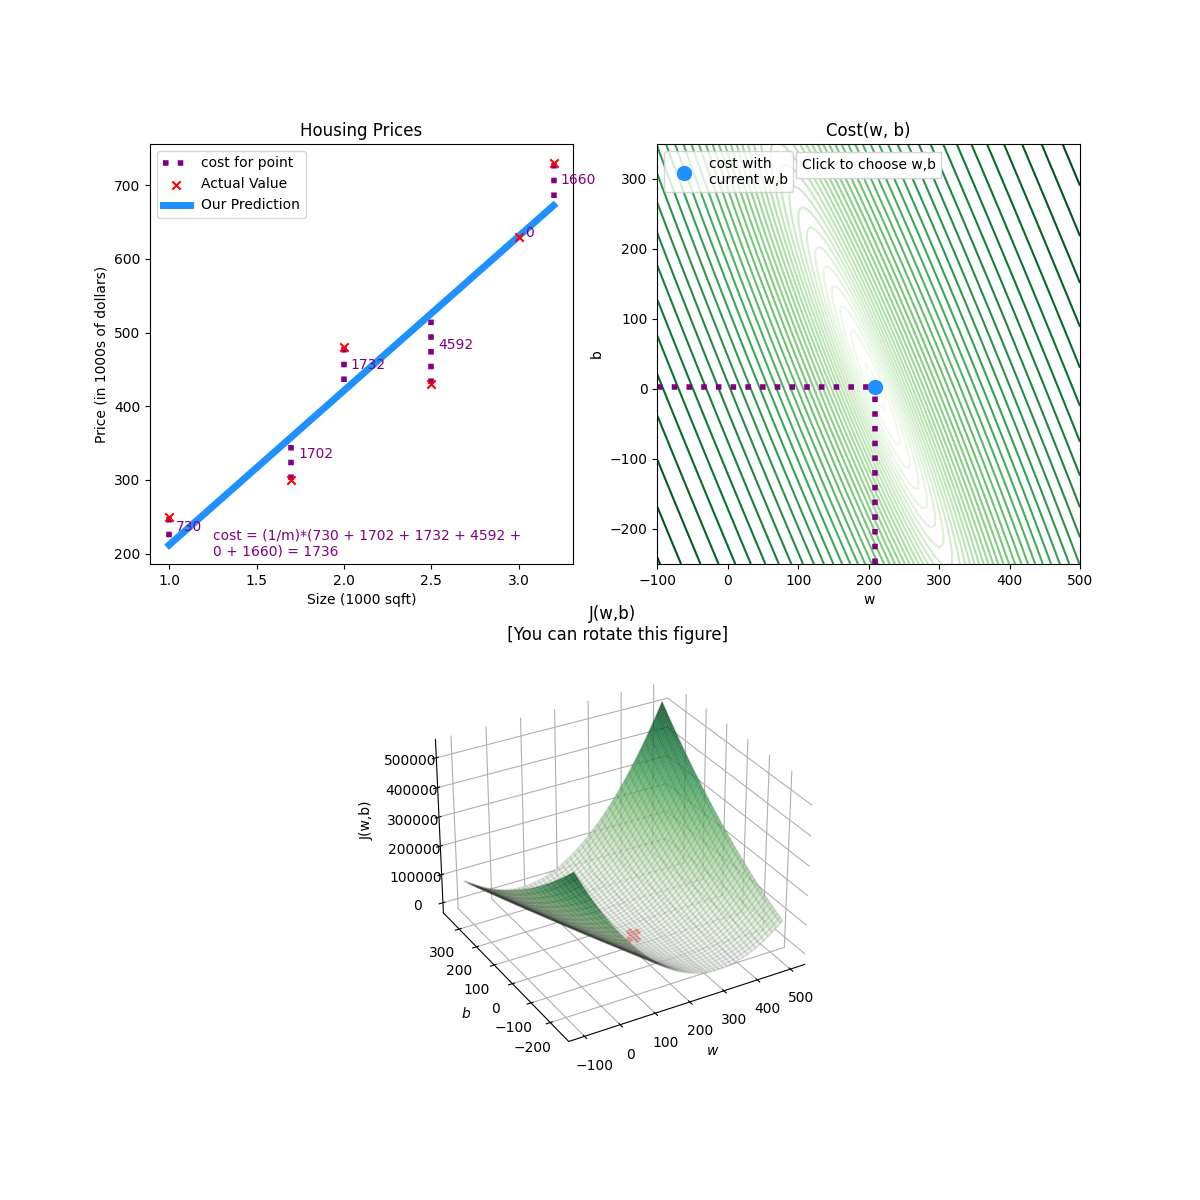

In [11]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

### Convex Cost surface

Because the cost function squares the loss, the "error surface" is convex, it will always have a minimum that can be reached

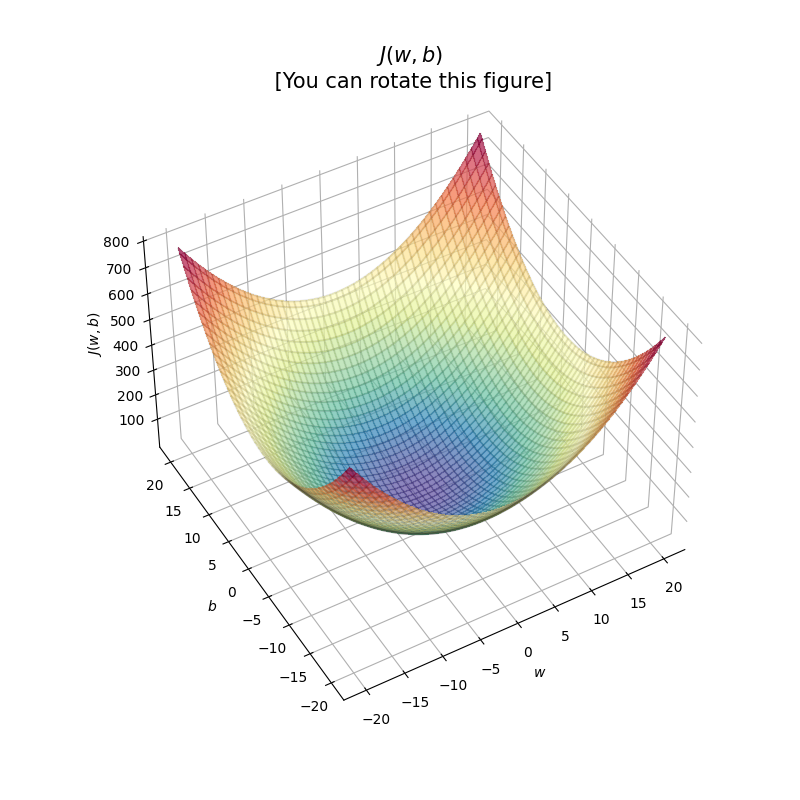

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$J(w,b)$', rotation=90)
ax.set_title("$J(w,b)$\n [You can rotate this figure]", size=15)

ax.view_init(45, -120)

w = np.linspace(-20, 20, 100)
b = np.linspace(-20, 20, 100)
z = lambda x, y: x**2 + y**2

W, B = np.meshgrid(w, b)
J = z(W, B)

ax.plot_surface(W, B, J,
                cmap='Spectral_r',
                alpha=0.7,
                antialiased=False)
ax.plot_wireframe(W, B, J, color='k', alpha=0.1);